Task 1: find an average class size (ACS) for each department, which is (# number of students taking the courses in a particular department) / ( #number of professors in that department)
------

In order tot obtain the values _(# number of students taking the courses in a particular department)_ and _(#number of professors in that department)_ data preparation was done.

In [1]:
#importing the libraries
%matplotlib inline
import seaborn as sns
import pandas as pd

In [2]:
#reading the given file
df = pd.read_excel("list.xls")
#dropping one course that seemed unrelevant (SHSS 301)
df=df.drop(485)
df.head()

,#,Course ID,Course Abbr,S/T,Course Title,Cr,Days,Time,Enr,Students in waitlist,Waitlist cap,Appr,Not Appr,Cap,Faculty,Room,Start Date,Finish Date,School,Level
0,1,227,ANT 140,1L,World Prehistory,3.0,T R,03:00 PM-04:15 PM,118,0,10,0,118,120,Paula Dupuy,Online,17-AUG-20,27-NOV-20,SSH,UG
1,2,1035,ANT 262,1L,Monkey business: Primate Society and Behavior,3.0,T R,10:30 AM-11:45 AM,20,0,10,2,18,24,Reed Coil,Online,17-AUG-20,27-NOV-20,SSH,UG
2,3,2961,ANT 280,1L,Introduction to Medical Anthropology,3.0,T R,12:00 PM-01:15 PM,24,0,10,0,24,24,Ramey Moore,Online,17-AUG-20,27-NOV-20,SSH,UG
3,4,4471,ANT 281/SOC 281,1L,"Health, Illness and Society",3.0,M W F,04:00 PM-04:50 PM,23,0,10,2,21,24,Ronald Moore,Online,17-AUG-20,27-NOV-20,SSH,UG
4,5,4736,ANT 333,1L,Anthropology of Space,3.0,T R,12:00 PM-01:15 PM,11,0,10,1,10,24,Reed Coil,Online,17-AUG-20,27-NOV-20,SSH,UG


From the webpage of [ssh.nu.edu.kz](https://ssh.nu.edu.kz/faculty/?fname=&depid=) the list of all professors and their departments was prepared and saved as "faculty-2.xlsx" file.

In [3]:
#reading the prepared file
faculty = pd.read_excel("faculty-2.xlsx")
faculty.head()

,Name,Dep
0,Daniel Pugh,Administration
1,Philip Enns,Administration
2,Christian Schoenbach,BIOL
3,Natalie Barteneva,BIOL
4,Gonzalo Hap Hortelano,BIOL


## Task 1a: Calculating number of enrolled students by department

Original dataset seems to include unnessesary features too. So, new dataframe **data** with only required column was selected.

In [4]:
#constructing dataframe with needed columns only
data = df[["Course Abbr", "S/T", "Enr", "Faculty"]]
data.head()

,Course Abbr,S/T,Enr,Faculty
0,ANT 140,1L,118,Paula Dupuy
1,ANT 262,1L,20,Reed Coil
2,ANT 280,1L,24,Ramey Moore
3,ANT 281/SOC 281,1L,23,Ronald Moore
4,ANT 333,1L,11,Reed Coil


### When working with above raw dataset, I have encountered 3 problems:
### 1. There are courses with mandatory recitation/seminar/lab sessions. Ex: Counting students of Calc I lecture and recitation will affect the actual number of students enrolled in math courses.
To address this problem it was decided to drop all the R/S/Lab sessions which have Lectures and leave those seminars/recitations/labs, which do not have Lectures with the same Course Code.

In [5]:
#First, all the numbers indicating section # was removed from 'S/T' field
data.loc[:,'S/T'] = data['S/T'].str.replace('\d+', '')


/Users/mbpro/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [6]:
#Secondly, all the courses which are Lectures have been selected
lecs = data.loc[data.loc[:, 'S/T'] == 'L']
lecs

,Course Abbr,S/T,Enr,Faculty
0,ANT 140,L,118,Paula Dupuy
1,ANT 262,L,20,Reed Coil
2,ANT 280,L,24,Ramey Moore
3,ANT 281/SOC 281,L,23,Ronald Moore
4,ANT 333,L,11,Reed Coil
...,...,...,...,...
595,WLL 245,L,27,Victoria Thorstensson
596,WLL 246,L,20,Victoria Thorstensson
597,WLL 257,L,20,Jenni Lehtinen
598,WLL 315,L,10,James Nikopoulos


In [7]:
#Dataset also icluded some courses without lecture sections, ex: Kazakh Lang courses
#Therefore, here we find courses that do not have lecture sections at all, only seminars or recitations
no_lecs = data.loc[~data.loc[:, 'Course Abbr'].isin(lecs.loc[:,'Course Abbr'])]
no_lecs

,Course Abbr,S/T,Enr,Faculty
5,ANT 399,IS,1,Ramey Moore
6,ANT 400,Int,0,Ramey Moore
7,ANT 400,Int,2,Ulan Bigozhin
9,ANT 498,R,2,Ramey Moore
47,BIOL 490,BLb,4,yingqiu Xie
...,...,...,...,...
510,SSH 503,IS,9,Mark Lawrence
583,WCS 391,S,10,Ti Wu
584,WCS 392,S,5,"Karie Pieczynski, Ti Wu"
587,WCS 730,S,4,Adina-Camelia Arvatu


In [8]:
#As final step, we simply concatenate these two sets of courses, making the list of unique courses
uniq_courses = pd.concat([lecs, no_lecs])
uniq_courses

,Course Abbr,S/T,Enr,Faculty
0,ANT 140,L,118,Paula Dupuy
1,ANT 262,L,20,Reed Coil
2,ANT 280,L,24,Ramey Moore
3,ANT 281/SOC 281,L,23,Ronald Moore
4,ANT 333,L,11,Reed Coil
...,...,...,...,...
510,SSH 503,IS,9,Mark Lawrence
583,WCS 391,S,10,Ti Wu
584,WCS 392,S,5,"Karie Pieczynski, Ti Wu"
587,WCS 730,S,4,Adina-Camelia Arvatu


### 2. Another problem that was encountered is courses which corresponds to 2 or more departments
#### After some thoughts, it seemed fair to divide the enrolled students number by each of department evenly

In [9]:
#Here is the list of courses that were from various departments
uniq_courses.loc[uniq_courses['Course Abbr'].str.contains('/')]


,Course Abbr,S/T,Enr,Faculty
3,ANT 281/SOC 281,L,23,Ronald Moore
106,EAS 506/PLS 514/SOC 514,L,17,Michael Ryan
198,HST 223/ANT 287,L,27,Clare Griffin
202,HST 271/TUR 271,L,27,Halit Akarca
204,HST 454/TUR 454,L,6,Jeanine Dagyeli
207,HST 554/TUR 554,L,5,Jeanine Dagyeli
369,PHIL 266/HST 266,L,28,Sydney Morrow
370,PHIL 267/REL 267,L,30,Sydney Morrow
479,REL 110/HST 110,L,150,Daniel Scarborough
484,REL 332/ANT 313,L,23,Ulan Bigozhin


In [10]:
#As suggested, # of enrolled students was distributed to related departments evenly
uniq_courses.loc[uniq_courses['Course Abbr'].str.contains('/'),'Enr'] = uniq_courses['Enr'].div(2, axis=0)
uniq_courses.loc[106, 'Enr'] = 6
uniq_courses.head()

,Course Abbr,S/T,Enr,Faculty
0,ANT 140,L,118.0,Paula Dupuy
1,ANT 262,L,20.0,Reed Coil
2,ANT 280,L,24.0,Ramey Moore
3,ANT 281/SOC 281,L,11.5,Ronald Moore
4,ANT 333,L,11.0,Reed Coil


PS: I know that it is impossible for half a student to be enrolled, but since our final goal will also involve float number, I though it is okey.

In [11]:
#We split the courses related to several department into individual ones
uniq_courses.rename(columns={'Course Abbr':'CourseAbbr'}, inplace=True)
print("Initial shape: ",uniq_courses.shape)
uniq_courses = uniq_courses.assign(CourseAbbr=uniq_courses['CourseAbbr'].str.split('/')).explode('CourseAbbr')
print("Shape after moderation: ",uniq_courses.shape)
uniq_courses.head()

Initial shape:  (474, 4)
Shape after moderation:  (493, 4)


,CourseAbbr,S/T,Enr,Faculty
0,ANT 140,L,118.0,Paula Dupuy
1,ANT 262,L,20.0,Reed Coil
2,ANT 280,L,24.0,Ramey Moore
3,ANT 281,L,11.5,Ronald Moore
3,SOC 281,L,11.5,Ronald Moore


#### As the next step, I added one more column indication the department to which course is related. This was done using the first 3-4 letters of the "CourseAbbr" field

In [12]:
uniq_courses.loc[:,'Dept'] = uniq_courses.loc[:,'CourseAbbr'].str[:4]
uniq_courses.loc[:,"Dept"] = uniq_courses.loc[:,"Dept"].str.strip()
uniq_courses.head()

,CourseAbbr,S/T,Enr,Faculty,Dept
0,ANT 140,L,118.0,Paula Dupuy,ANT
1,ANT 262,L,20.0,Reed Coil,ANT
2,ANT 280,L,24.0,Ramey Moore,ANT
3,ANT 281,L,11.5,Ronald Moore,ANT
3,SOC 281,L,11.5,Ronald Moore,SOC


#### There are some lists of course codes which are related to the same department. Ex: Phil, Rel, Hst is in one department

In [13]:
#Contruct a dictionary indicating which code corresponds to which dpt
dpts = ({'PLS': 'PSIR',
         'PHIL': 'HST',
         'REL': 'HST',
         'TUR': 'KAZ',
         'KFL': 'KAZ',
         'LING': 'WLL',
         'SPA': 'WLL',
         'KOR': 'WLL',
         'CHN': 'WLL',
         'FRE': 'WLL',
         'ANT': 'SOC',
         'SSH': 'MATH'})
uniq_courses = uniq_courses.replace({"Dept": dpts})
#group the obtained dataframe by Departments and sum the enrolled students
EnrStud = uniq_courses.groupby(['Dept']).sum()
EnrStud


,Enr
Dept,
BIOL,1361.0
CHEM,802.0
EAS,79.0
ECON,1157.0
HST,1532.0
KAZ,1174.0
MATH,2555.0
PHYS,1304.0
PSIR,1050.0


### 3. From the above list we can see that there is a EAS department which does not actually exist. Eurasian Studies is interdisciplinary program where profs from different humanities department teach classes. 
#### The question is towards which department to count the number of student enrolled in this program. It was decided to relate the EAS course depending on the faculty member of that course. Ex: EAS 501 is taught by D.Beben (History Professor), so this course will be counted as being the HST department course.
This was done by looking up at the department of the professor from the prepared *Faculty* dataframe

In [14]:
full = uniq_courses.merge(faculty, how = 'left', left_on='Faculty', right_on='Name')
uniq_courses.loc[uniq_courses['Dept'] == 'EAS', 'Dept'] = full.loc[:, 'Dep']
uniq_courses.head()

,CourseAbbr,S/T,Enr,Faculty,Dept
0,ANT 140,L,118.0,Paula Dupuy,SOC
1,ANT 262,L,20.0,Reed Coil,SOC
2,ANT 280,L,24.0,Ramey Moore,SOC
3,ANT 281,L,11.5,Ronald Moore,SOC
3,SOC 281,L,11.5,Ronald Moore,SOC


If we group obtained dataframe again by Departments, we can see that there is no EAS anymore.

In [15]:
#This is final step in obtaining the number of enrolled students by each department
EnrStud = uniq_courses.groupby(['Dept']).sum()
EnrStud.reset_index(level=0, inplace=True)
EnrStud

,Dept,Enr
0,BIOL,1361.0
1,CHEM,802.0
2,ECON,1229.0
3,HST,1536.0
4,KAZ,1174.0
5,MATH,2555.0
6,PHYS,1304.0
7,PSIR,1050.0
8,SOC,811.5
9,WCS,1374.5


## Task 1b: calculating the number of professors in each department
In initially provided "list.xlsx" there are some professors written separated by commma. We need to split them first:

In [16]:
#Splitting the profs which are written separated by comma
profs = pd.Series(uniq_courses['Faculty'].str.split(', ', expand=True).stack().unique())

*profs* is the list of all faculty member that at least once appeared in "List.xlsx". 
We also have dataframe *faculty* which consists of all professors from the ssh.nu.edu.kz with their departments. However in that document there are some profs that do not teach this semester. We need to drop them and leave only 'active' profs:

In [17]:
#From the faculty (a doc with all profs) we are leaving only those whos name appears in list)
active_faculty = faculty.loc[faculty.loc[:, 'Name'].isin(profs)]
active_faculty.head()

,Name,Dep
1,Philip Enns,Administration
2,Christian Schoenbach,BIOL
3,Natalie Barteneva,BIOL
4,Gonzalo Hap Hortelano,BIOL
5,Timo Burster,BIOL


We can check if some of the profs remained not included:

In [18]:
#Checking if there are any profs from list.xlsx which are not included in active_profs
passive_faculty2 = profs[~profs.isin(active_faculty.loc[:,'Name'])]
passive_faculty2

Series([], dtype: object)

Now, we can group the professors according to the departments they are in and see their number:

In [19]:
profs_count = active_faculty.groupby(['Dep']).count()
profs_count.reset_index(level=0, inplace=True)
profs_count.rename(columns={'Name':'Profs_num'}, inplace=True)
profs_count

,Dep,Profs_num
0,Administration,1
1,BIOL,20
2,CHEM,15
3,Department of CS,2
4,ECON,14
5,HST,13
6,KAZ,26
7,MATH,19
8,PHYS,11
9,PSIR,14


### Last step in finding the required ACS values is to left join two dataframes of enrolled student and number of professor by department and do relevant division:

In [26]:
result  = EnrStud.merge(profs_count, how = 'left', left_on='Dept', right_on='Dep')
result = result.drop(['Dep'], axis=1)
result['ACS'] = result['Enr'].div(result['Profs_num'])
result = result.sort_values(['ACS'], ascending=False)
result

,Dept,Enr,Profs_num,ACS
5,MATH,2555.0,19,134.473684
6,PHYS,1304.0,11,118.545455
3,HST,1536.0,13,118.153846
2,ECON,1229.0,14,87.785714
7,PSIR,1050.0,14,75.000000
0,BIOL,1361.0,20,68.050000
8,SOC,811.5,14,57.964286
10,WLL,927.0,16,57.937500
1,CHEM,802.0,15,53.466667
4,KAZ,1174.0,26,45.153846


## Task 2: visualize ACSs across departments with a bar chart

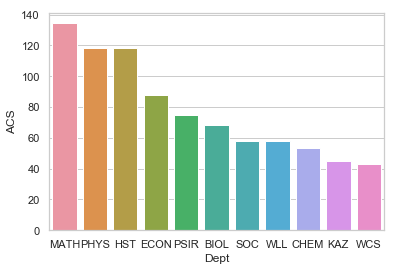

In [27]:
sns.set(style="whitegrid")
ax = sns.barplot(x="Dept", y="ACS", data=result)

## Task 3: Test the hypothesis:

In [28]:
#Output the statistical description of the dataset of ACS in other departments than MATH
math_acs = float(result.loc[result.loc[:,'Dept']=='MATH', 'ACS'])
result = result.loc[result.loc[:,'Dept']!='MATH']

The hypothesis we are testing is:
$H_0: ACS_{other departments} = ACS_{math}$ VS
$H_1: ACS_{other departments} < ACS_{math}$

In [29]:
#Now we are going to test hypothesis that H0: ACWmean = 134.4 VS H1: ACWmean < 134.4
n = len(result)
mean = result["ACS"].mean()
sd = result["ACS"].std()
(n, mean, sd)


(10, 72.50104385198135, 27.629722782884922)

To test $H_0$ Student T test will be used

In [31]:
import statsmodels.api as sm
sm.stats.ztest(result['ACS'], value = math_acs, alternative = "smaller")

(-7.092894043398492, 6.566800708120067e-13)

From the above output we see that probabilty of ACS of the department in SSH to be as high as ACS of Math department is critically low - 6.566800708120067e-13. This number is much less than suggested significance level=0.05, therefore, we conclude to **reject the hypothesis** that the ACS for math department is the same as ACS of others.